<a href="https://colab.research.google.com/github/ethannorona/C_118_Project/blob/main/C_118_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving stars.csv to stars.csv


In [18]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("stars.csv")
print(df.head())

fig = px.scatter(df, x = "Size", y = "Light")
fig.show()

        Size     Light
0   5.882677  1.325411
1  10.912830  3.183217
2   0.281190  0.620011
3   7.682623  1.804578
4  11.034071  3.390440


In [ ]:
#Code to find the best value of k using WCSS
from sklearn.cluster import KMeans

X = df.iloc[:,[0,1]].values
print(X)

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  #Inertia method returns wcss for that model
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



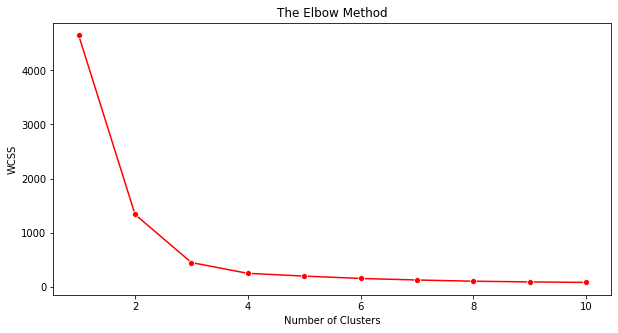

In [20]:
#Code to plot the elbow graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
sns.lineplot(range(1,11), wcss, marker = 'o', color = 'red')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

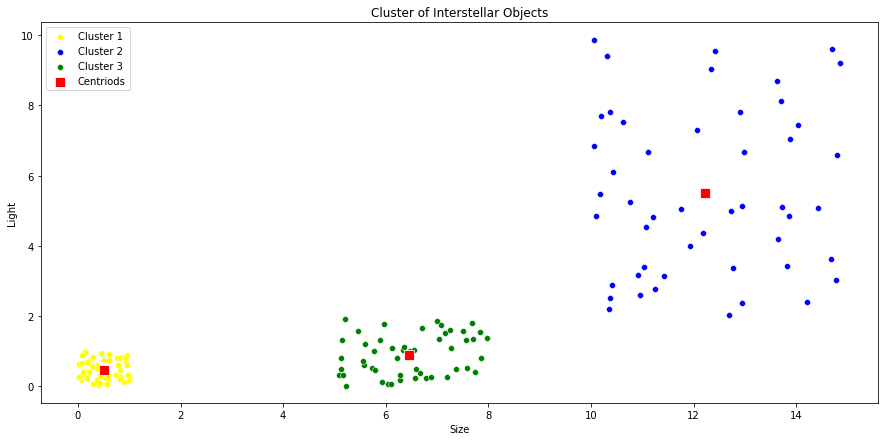

In [22]:
#Code to plot the cluster points on the graph
plt.figure(figsize = [15,7])
sns.scatterplot(X[y_kmeans == 0,0], X[y_kmeans == 0,1], color = 'yellow', label = 'Cluster 1')
sns.scatterplot(X[y_kmeans == 1,0], X[y_kmeans == 1,1], color = 'blue', label = 'Cluster 2')
sns.scatterplot(X[y_kmeans == 2,0], X[y_kmeans == 2,1], color = 'green', label = 'Cluster 3')
sns.scatterplot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'red', label = 'Centriods', s = 100, marker = ',')
plt.grid(False)
plt.title("Cluster of Interstellar Objects")
plt.xlabel("Size")
plt.ylabel("Light")
plt.legend()
plt.show()